In [3]:
import pandas as pd   
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#Подгрузим данные о netflix
df = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=481487463&format=csv'
)

In [5]:
#выкидываем данны о том, что не нужно
df=df.drop(columns=['Mobile'])
#Называем нормально столбец
df=df.rename(columns={'Unnamed: 5': "currency"})

In [6]:
df

,Country,Basic,Standard,Premium,currency
0,Argentina,379.00,639.00,939.00,ARS
1,Australia,10.99,16.99,22.99,AUS
2,Austria,7.99,12.99,17.99,EUR
3,Belgium,8.99,13.49,17.99,EUR
4,Bolivia,7.99,10.99,13.99,USD
...,...,...,...,...,...
60,Ukraine,4.99,7.49,9.99,EUR
61,United Kingdom,5.99,9.99,13.99,GBP
62,United States,9.99,15.49,19.99,USD
63,Uruguay,8.99,12.99,15.99,USD


# 1) Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны

In [7]:
#Подгрузим данные о PPP
ppp = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1ullXLeTvmXFEZMn3inDO3ED_XjKz7uBUe4Aze0SfeoU/export?gid=0&format=csv')
#Выкидываем левые данные
ppp=ppp.drop(index=[0,1]);
ppp=ppp.drop(columns=['Unnamed: 1', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
#Называем нормально столбцы
ppp=ppp.rename(columns={'Unnamed: 0': 'Country', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'PPP'})

In [8]:
ppp

,Country,Region,PPP
2,Liechtenstein,Europe,NaN
3,Luxembourg,Europe,122.74
4,Monaco,Europe,NaN
5,Singapore,Asia,102.742
6,Ireland,Europe,99.239
...,...,...,...
225,Malawi,Africa,1.005
226,DR Congo,Africa,1.132
227,Central African Republic,Africa,1.013
228,Somalia,Africa,941


In [9]:
#Преобразуем к числовому формату РРР
ppp['PPP'] = ppp['PPP'].astype('float64')

In [10]:
ppp.dtypes

Country     object
Region      object
PPP        float64
dtype: object

In [11]:
#Делаем единый датафрэйм со всеми нужными нам данными
full_date=pd.merge(df, ppp)

In [12]:
full_date

,Country,Basic,Standard,Premium,currency,Region,PPP
0,Argentina,379.00,639.00,939.00,ARS,Americas,22.141
1,Australia,10.99,16.99,22.99,AUS,Oceania,54.891
2,Austria,7.99,12.99,17.99,EUR,Europe,57.891
3,Belgium,8.99,13.49,17.99,EUR,Europe,53.973
4,Bolivia,7.99,10.99,13.99,USD,Americas,8.832
...,...,...,...,...,...,...,...
59,Ukraine,4.99,7.49,9.99,EUR,Europe,13.943
60,United Kingdom,5.99,9.99,13.99,GBP,Europe,47.089
61,United States,9.99,15.49,19.99,USD,Americas,68.309
62,Uruguay,8.99,12.99,15.99,USD,Americas,23.474


# 2) Построить график корреляции между средним доходом (PPP) и ценой подписки

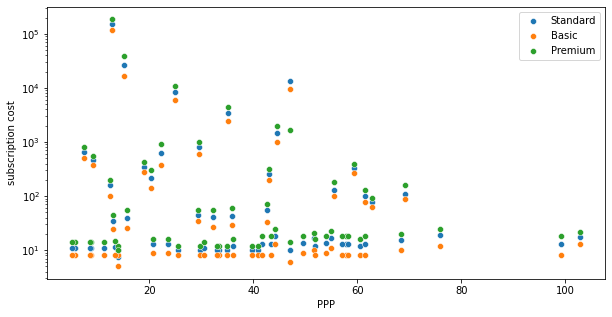

In [13]:
plt.figure(figsize=(10,5))
splot=sns.scatterplot(x="PPP", y="Standard", data=full_date);
splot=sns.scatterplot(x="PPP", y="Basic", data=full_date);
splot=sns.scatterplot(x="PPP", y="Premium", data=full_date);
splot.set(yscale="log", xlabel='PPP', ylabel='subscription cost');
splot.legend(["Standard", "Basic", "Premium"]);

In [14]:
#Наблюдается небольшое увеличение цены подписки в с ростом РРР, но в основном облако данных слишком рассеяно, 
#по изображению трудно сказать, есть ли связь на самом деле

## 1) средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [15]:
mean_by_currency = full_date.groupby(['currency']).mean().drop(columns=["PPP"]);

In [16]:
mean_by_currency

,Basic,Standard,Premium
currency,,,
ARS,379.000000,639.0000,939.000000
AUS,10.990000,16.9900,22.990000
BRL,25.900000,39.9000,55.900000
CAD,9.990000,16.4900,20.990000
CHF,11.900000,18.9000,24.900000
CLP,5940.000000,8320.0000,10700.000000
COP,16900.000000,26900.0000,38900.000000
CZK,199.000000,259.0000,319.000000
DKK,79.000000,99.0000,129.000000


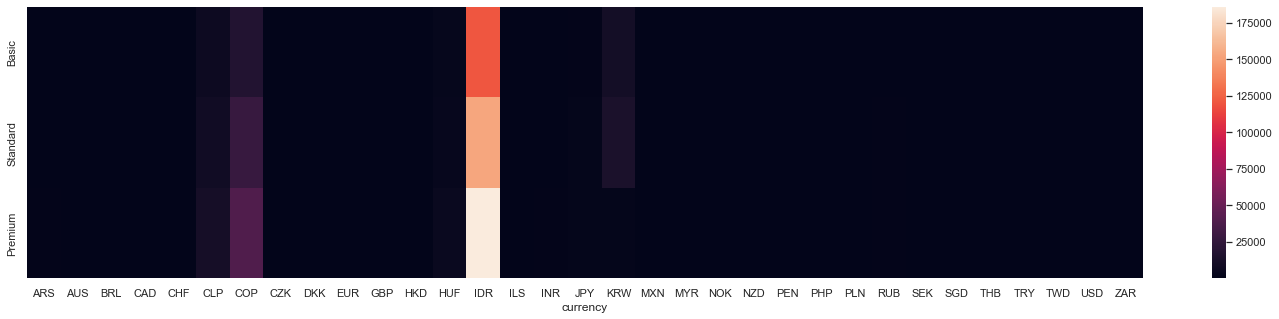

In [17]:
sns.set(style='white');
plt.figure(figsize=(25, 5));
sns.heatmap(mean_by_currency.T);
#Видим, что самая дорогая подписка в старанах, где обращается Индонезийская рупия 

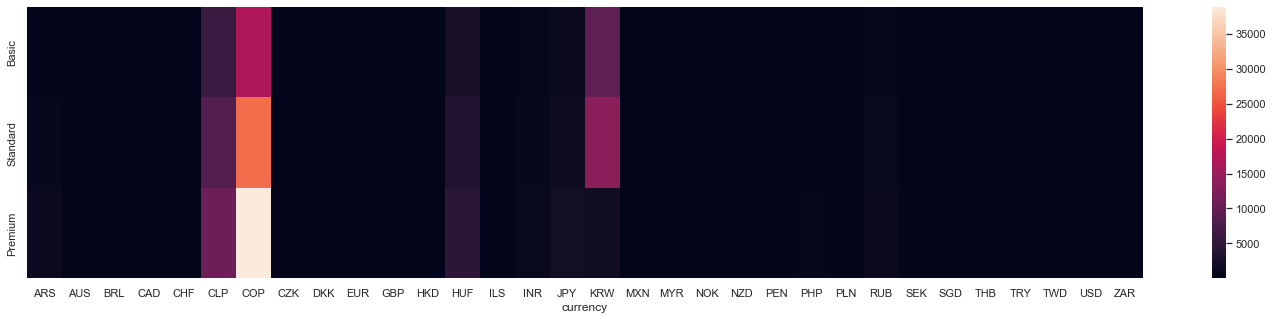

In [18]:
sns.set(style='white');
plt.figure(figsize=(25, 5));
sns.heatmap(mean_by_currency.drop(index="IDR").T);
#Видим, что вторая по цене подписка в старанах, где обращается Колумбийское песо
#А ещё можем заметить, что в странах, где общается Южнокорейская вона, premimum подписка стоит дешевле остальных видов подписок 

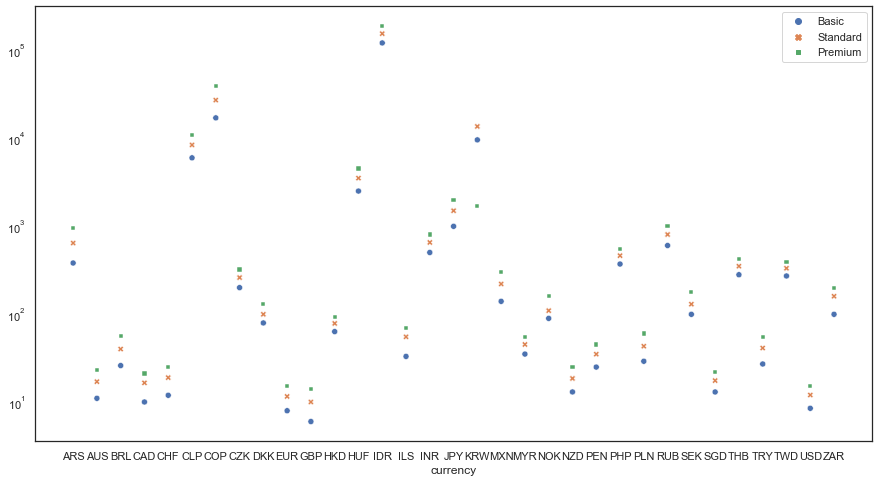

In [19]:
plt.figure(figsize=(15,8))
splot=sns.scatterplot(data=mean_by_currency);
splot.set(yscale="log");
# Видим, что в странах с Фунтами стерлингов самая дешёвая подписка

## 2) Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [20]:
mean_by_Region = full_date.groupby(['Region']).mean().drop(columns=["PPP"]);

In [21]:
mean_by_Region

,Basic,Standard,Premium
Region,,,
Africa,99.000000,159.000000,199.000000
Americas,1468.437500,2267.325000,3193.525000
Asia,11006.489167,14167.780833,16010.989167
Europe,114.928788,158.610606,204.171212
Oceania,11.990000,17.740000,23.990000


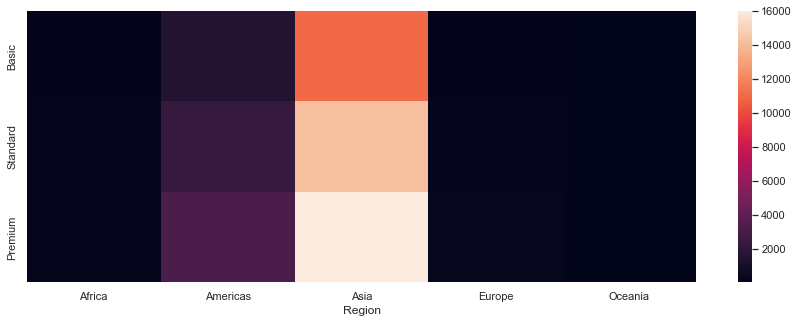

In [22]:
sns.set(style='white');
plt.figure(figsize=(15, 5));
sns.heatmap(mean_by_Region.T);

In [23]:
#Видим, что самая дорогая подписка в Азии (что согласуется с предыдущими результатами об Индонезийской рупи)
#На втором месте по цене находится Америка
#В Океании самые дешевые подписки

## 3) Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [24]:
#Пытаемся понять, как тут пишется Чехия
dict(full_date['Country'])

{0: 'Argentina',
 1: 'Australia',
 2: 'Austria',
 3: 'Belgium',
 4: 'Bolivia',
 5: 'Brazil',
 6: 'Bulgaria',
 7: 'Canada',
 8: 'Chile',
 9: 'Colombia',
 10: 'Costa Rica',
 11: 'Croatia',
 12: 'Czech Republic',
 13: 'Denmark',
 14: 'Ecuador',
 15: 'Estonia',
 16: 'Finland',
 17: 'France',
 18: 'Germany',
 19: 'Gibraltar',
 20: 'Greece',
 21: 'Guatemala',
 22: 'Honduras',
 23: 'Hong Kong',
 24: 'Hungary',
 25: 'Iceland',
 26: 'India',
 27: 'Indonesia',
 28: 'Ireland',
 29: 'Israel',
 30: 'Italy',
 31: 'Japan',
 32: 'Latvia',
 33: 'Lithuania',
 34: 'Malaysia',
 35: 'Mexico',
 36: 'Moldova',
 37: 'Monaco',
 38: 'Netherlands',
 39: 'New Zealand',
 40: 'Norway',
 41: 'Paraguay',
 42: 'Peru',
 43: 'Philippines',
 44: 'Poland',
 45: 'Portugal',
 46: 'Romania',
 47: 'Russia',
 48: 'San Marino',
 49: 'Singapore',
 50: 'Slovakia',
 51: 'South Africa',
 52: 'South Korea',
 53: 'Spain',
 54: 'Sweden',
 55: 'Switzerland',
 56: 'Taiwan',
 57: 'Thailand',
 58: 'Turkey',
 59: 'Ukraine',
 60: 'United Ki

In [25]:
full_date_per_PPP=pd.DataFrame(columns = ['Country','Basic','Standard','Premium'])

In [26]:
def func1(x):
    return x[1] / x[6]
def func2(x):
    return x[2] / x[6]
def func3(x):
    return x[3] / x[6]

full_date_per_PPP['Basic']=full_date.apply(func1, axis=1)
full_date_per_PPP['Standard']=full_date.apply(func2, axis=1)
full_date_per_PPP['Premium']=full_date.apply(func3, axis=1)
full_date_per_PPP['Country']=full_date['Country']

In [27]:
full_date_per_PPP[full_date_per_PPP['Country']=='Czech Republic']

,Country,Basic,Standard,Premium
12,Czech Republic,4.632647,6.029425,7.426204


In [28]:
#Базовая подписка в Чехии стоит как 5 средних доходов, стандартная как 6, а премиальная как 7 средних доходов.

## 4) Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [29]:
basic = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=0&format=csv'
)

In [30]:
#берём нужный данные
basic=basic[['Country','# of TV Shows']]
basic=basic.drop(index=[65,66,67,68])

In [31]:
basic

,Country,# of TV Shows
0,Turkey,2930.0
1,India,3718.0
2,Argentina,3154.0
3,Colombia,3156.0
4,Brazil,3162.0
...,...,...
60,Sweden,2973.0
61,Denmark,2978.0
62,San Marino,1937.0
63,Croatia,1675.0


In [32]:
#нумеруем по порядку
basic['rank']=basic['# of TV Shows'].rank(method='dense')

In [33]:
#берем пять нужных
basic[basic['rank']>len(basic['# of TV Shows'].unique())-5]

,Country,# of TV Shows,rank
7,Hungary,4802.0,53.0
9,United Kingdom,4551.0,52.0
10,Czech Republic,5234.0,56.0
14,Slovakia,5055.0,55.0
16,Bulgaria,4819.0,54.0


In [34]:
#Топ5 стран Hungary, United Kingdom,Czech Republic,Slovakia,Bulgaria

## 5) Какой процент среднего дохода россиянина будет составлять подписка Netflix?


In [35]:
full_date_per_PPP_proc=pd.DataFrame(columns = ['Country','Basic','Standard','Premium'])

In [36]:
full_date_per_PPP_proc['Basic'] = pd.Series(
    ["{0:.2f}%".format(val*100) for val in full_date_per_PPP['Basic']], index = full_date_per_PPP.index)

full_date_per_PPP_proc['Standard'] = pd.Series(
    ["{0:.2f}%".format(val*100) for val in full_date_per_PPP['Standard']], index = full_date_per_PPP.index)

full_date_per_PPP_proc['Premium'] = pd.Series(
    ["{0:.2f}%".format(val*100) for val in full_date_per_PPP['Premium']], index = full_date_per_PPP.index)

full_date_per_PPP_proc['Country']=full_date['Country']
print(full_date_per_PPP_proc)

           Country     Basic  Standard   Premium
0        Argentina  1711.76%  2886.05%  4241.00%
1        Australia    20.02%    30.95%    41.88%
2          Austria    13.80%    22.44%    31.08%
3          Belgium    16.66%    24.99%    33.33%
4          Bolivia    90.47%   124.43%   158.40%
..             ...       ...       ...       ...
59         Ukraine    35.79%    53.72%    71.65%
60  United Kingdom    12.72%    21.22%    29.71%
61   United States    14.62%    22.68%    29.26%
62         Uruguay    38.30%    55.34%    68.12%
63       Venezuela   154.31%   212.24%   270.18%

[64 rows x 4 columns]


In [37]:
full_date_per_PPP_proc[full_date_per_PPP_proc['Country']=='Russia']

,Country,Basic,Standard,Premium
47,Russia,2031.54%,2709.85%,3388.16%


In [38]:
#Базовая подписка в России стоит как 2031% средних доходов, стандартная как 2710%, а премиальная как 3388% средних доходов.

## 6) На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)


In [39]:
basic = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=0&format=csv'
)

In [40]:
#берём нужный данные
basic=basic[['Country','Price per Title']]
basic=basic.drop(index=[65,66,67,68])

In [41]:
basic=basic.sort_values(by=['Price per Title'], ascending=False)

In [42]:
#Пытаемся вспомнить,как функция называется
[
    i
    for i in dir(pd.DataFrame())
    if i.startswith('index')
]

['index']

In [43]:
basic[basic['Country']=='Russia'].index

Int64Index([25], dtype='int64')

In [44]:
#Россия занимает 25 место из самых дорогих стран по Cost Per Title для базовой подписки

In [45]:
Standard = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=720312140&format=csv'
)
#берём нужный данные
Standard=Standard[['Country','Price per Title']]
Standard=Standard.drop(index=[65,66,67,68])
Standard=Standard.sort_values(by=['Price per Title'], ascending=False)
Standard[Standard['Country']=='Russia'].index
#Россия занимает 17 место из самых дорогих стран по Cost Per Title для стандартной подписки

Int64Index([17], dtype='int64')

In [46]:
Premium = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=41907226&format=csv'
)

#берём нужный данные
Premium=Premium[['Country','Price per Title']]
Premium=Premium.drop(index=[65,66,67,68])

Premium=Premium.sort_values(by=['Price per Title'], ascending=False)

Premium[Premium['Country']=='Russia'].index

#Россия занимает 17 место из самых дорогих стран по Cost Per Title для премиум подписки

Int64Index([17], dtype='int64')

## 7) В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [47]:
df

,Country,Basic,Standard,Premium,currency
0,Argentina,379.00,639.00,939.00,ARS
1,Australia,10.99,16.99,22.99,AUS
2,Austria,7.99,12.99,17.99,EUR
3,Belgium,8.99,13.49,17.99,EUR
4,Bolivia,7.99,10.99,13.99,USD
...,...,...,...,...,...
60,Ukraine,4.99,7.49,9.99,EUR
61,United Kingdom,5.99,9.99,13.99,GBP
62,United States,9.99,15.49,19.99,USD
63,Uruguay,8.99,12.99,15.99,USD


In [48]:
df[df['Premium']==df['Premium'].min()]

,Country,Basic,Standard,Premium,currency
60,Ukraine,4.99,7.49,9.99,EUR


In [49]:
df[df['Basic']==df['Basic'].min()]

,Country,Basic,Standard,Premium,currency
60,Ukraine,4.99,7.49,9.99,EUR


In [50]:
df[df['Standard']==df['Standard'].min()]

,Country,Basic,Standard,Premium,currency
60,Ukraine,4.99,7.49,9.99,EUR


In [51]:
#Лучше всего использовать vpn Украины